In this Project, my objective is to analyze the text of the series of books by George R. R. Martin, A Song of Ice and Fire (Game of Thrones) and specifically, research the connections and similarities between the characters.
<br>
This will require building a network of connections between characters based on text mining, word embeddings and network analysis tools.
<br><br>
Made by: Alon Cohen
<br>
bigalon1990@gmail.com

## Scraping the characters data


In [103]:
#using Requests and BeautifulSoup I downloaed the data from https://awoiaf.westeros.org/index.php/Main_Page. 

import requests
result = requests.get("http://awoiaf.westeros.org/index.php/List_of_characters")
c = result.content


In [5]:
#Extracting the information

from bs4 import BeautifulSoup 
soup = BeautifulSoup(c, "lxml")  # parse HTML page 
main_list_element = soup.find_all('div',{'id':'mw-content-text'})[0] # retrieve HTML element that contains the list of characters
list_of_elements = main_list_element.find_all('li') # find all list elements
#Construct a dictionary of character_name -> URL for each character
characters = dict()
for list_element in list_of_elements:  
    character_link = list_element.find_all('a')[0] # get HTML element with link & character name
    characters[character_link.text] = character_link.attrs['href']
print('Found {} characters'.format(len(characters))) 

Found 1960 characters


In [115]:
Create an inverse dictionary of link -> character name
inverted_dict = dict([[v,k] for k,v in characters.items()])

list(iter(inverted_dict.items()))[0:20]

[('/index.php/Abelar_Hightower', 'Abelar Hightower'),
 ('/index.php/Addam', 'Addam'),
 ('/index.php/Addam_Frey', 'Addam Frey'),
 ('/index.php/Addam_Marbrand', 'Addam Marbrand'),
 ('/index.php/Addam_Osgrey', 'Addam Osgrey'),
 ('/index.php/Addam_Velaryon', 'Addam Velaryon'),
 ('/index.php/Addison_Hill', 'Addison Hill'),
 ('/index.php/Aegon_Blackfyre', 'Aegon Blackfyre'),
 ('/index.php/Aegon_Frey_(son_of_Aenys)', 'Aegon Frey'),
 ('/index.php/Aegon_I_Targaryen', 'Aegon I Targaryen'),
 ('/index.php/Aegon_II_Targaryen', 'Aegon II Targaryen'),
 ('/index.php/Aegon_III_Targaryen', 'Aegon III Targaryen'),
 ('/index.php/Aegon_IV_Targaryen', 'Aegon IV Targaryen'),
 ('/index.php/Aegon_V_Targaryen', 'Aegon V Targaryen'),
 ('/index.php/Aegon_Targaryen_(son_of_Jaehaerys_I)', 'Aegon Targaryen'),
 ('/index.php/Aegor_Rivers', 'Aegor Rivers'),
 ('/index.php/Aelinor_Penrose', 'Aelinor Penrose'),
 ('/index.php/Aemma_Arryn', 'Aemma Arryn'),
 ('/index.php/Aemon_Blackfyre', 'Aemon Blackfyre'),
 ('/index.php/Ae

In [7]:
#Download each character page, parse it, extract its culture  and all mentioned characters in the page

import collections
from lxml import html
import pandas as pd
character_count=collections.Counter()
character_cultur=dict()
character_text=dict()
inverted_culture=dict()
character_network = collections.Counter()

for character_url, character_name in inverted_dict.items():
    character_html = requests.get('http://awoiaf.westeros.org' + character_url)
    page = html.fromstring(character_html.text)
    culture = page.xpath('//tr[th = "Culture"]/td/a/text()')
    soup = BeautifulSoup(character_html.content, "lxml")
    character = {'name':character_name, 'url':character_url, 'html_content':character_html.text }    
    character['text'] = soup.find('div',{'id':'mw-content-text'}).text 
    character['links'] = collections.Counter([inverted_dict[link.get('href')] for link in soup.find_all('a')  if link.get('href') in inverted_dict ]) 
    character_count=character_count + character['links']
    character_cultur[character_name]=culture 
    character_text[character_name]=soup.find("div",{"id":"mw-content-text"}).text
    for x in character:
        x = character_name
        for y in character['links']:
            character_network[(x, y)] = character['links'][y]



In [8]:
#Save the dictionaries

import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
save_obj(character_count,'character_count')
save_obj(character_cultur,'character_cultur')
save_obj(character_text,'character_text')
save_obj(inverted_culture,'inverted_culture')
save_obj(character_network,'character_network')

In [9]:
character_cultur = {k: None if not v else v for k, v in character_cultur.items() }


## “Feel” the data: Descriptive statistics

In [11]:
print('Loaded {0:d} unique links - {1:d} total links'.format(
        len(character_network),
        sum(character_network.values())))


Loaded 25580 unique links - 41076 total links


In [116]:
list(iter(character_cultur.items()))[0:20]

[('Abelar Hightower', ['Reach']),
 ('Addam', None),
 ('Addam Frey', ['Rivermen']),
 ('Addam Marbrand', ['westermen']),
 ('Addam Osgrey', None),
 ('Addam Velaryon', ['crownlands']),
 ('Addison Hill', ['Westermen']),
 ('Aegon Blackfyre', ['crownlands']),
 ('Aegon Frey', None),
 ('Aegon I Targaryen', None),
 ('Aegon II Targaryen', None),
 ('Aegon III Targaryen', None),
 ('Aegon IV Targaryen', None),
 ('Aegon V Targaryen', None),
 ('Aegon Targaryen', ['Crownlands']),
 ('Aegor Rivers', ['Rivermen']),
 ('Aelinor Penrose', None),
 ('Aemma Arryn', None),
 ('Aemon Blackfyre', ['crownlands']),
 ('Aemon Costayne', None)]

In [14]:
# 10 most mentioned characters
character_count.most_common(10)

[('Jaime Lannister', 822),
 ('Tyrion Lannister', 774),
 ('Tywin Lannister', 654),
 ('Cersei Lannister', 647),
 ('Jon Snow', 588),
 ('Eddard Stark', 555),
 ('Stannis Baratheon', 513),
 ('Arya Stark', 484),
 ('Daenerys Targaryen', 458),
 ('Sansa Stark', 438)]

In [15]:
#10 most connected characters
character_network.most_common(10)

[(('Cersei Lannister', 'Jaime Lannister'), 19),
 (('Cersei Lannister', 'Tyrion Lannister'), 18),
 (('Jorah Mormont', 'Daenerys Targaryen'), 18),
 (('Tywin Lannister', 'Tyrion Lannister'), 18),
 (('Brienne of Tarth', 'Jaime Lannister'), 17),
 (('Hoster Tully', 'Catelyn Stark'), 17),
 (('Kevan Lannister', 'Tywin Lannister'), 17),
 (('Jaime Lannister', 'Cersei Lannister'), 16),
 (('Joffrey Baratheon', 'Cersei Lannister'), 16),
 (('Petyr Baelish', 'Sansa Stark'), 16)]

## Creating characters network

In [16]:
from networkx import nx
graph = nx.Graph()
for character, weight in character_network.items():
    if weight>=5:
        graph.add_edge(character[0],character[1],weight = weight)
print('Nodes: {0:d}, Links: {1:d}'.format(graph.number_of_nodes(),graph.number_of_edges()))        

Nodes: 309, Links: 777


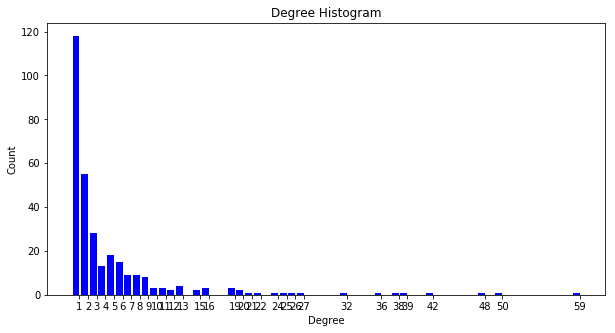

In [20]:
#Degree distribution histogram
import matplotlib.pyplot as plt
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg,)

# ax.set_xticklabels(('Dynamic (AV)',"Dynamic (No AV)",'Static (AV)','Static (No AV)'),rotation=40)
plt.show()


In [21]:
#Erase nodes with degree lower than 2, for a clearer network 
proceed = True
while proceed: 
    nodes_to_remove =[node for node, degree in graph.degree(graph.nodes) if degree < 2]
    if len(nodes_to_remove)==0:
        proceed = False
    else:
        print('Removing {0:d} nodes'.format(len(nodes_to_remove)))
        graph.remove_nodes_from(nodes_to_remove)
        print('Remaining Nodes: {0:d}, Links: {1:d}'.format(graph.number_of_nodes(),graph.number_of_edges()))    

Removing 118 nodes
Remaining Nodes: 191, Links: 668
Removing 10 nodes
Remaining Nodes: 181, Links: 660
Removing 1 nodes
Remaining Nodes: 180, Links: 659


In [22]:
undirected_graph = graph.to_undirected()
print('Nodes: {0:d}, Links: {1:d}'.format(graph.number_of_nodes(),graph.number_of_edges()))        

Nodes: 180, Links: 659


In [23]:
#Degree centrality
node_degree_centrality = nx.degree_centrality(graph)
counter_centrality = collections.Counter(node_degree_centrality)
print (counter_centrality.most_common(10))


[('Jaime Lannister', 0.26256983240223464), ('Pycelle', 0.26256983240223464), ('Tywin Lannister', 0.26256983240223464), ('Tyrion Lannister', 0.20670391061452514), ('Cersei Lannister', 0.20670391061452514), ('Arya Stark', 0.18435754189944134), ('Eddard Stark', 0.1675977653631285), ('Otto Hightower', 0.15083798882681565), ('Jon Snow', 0.13966480446927373), ('Barristan Selmy', 0.1340782122905028)]


In [24]:
#betweeness centrality
node_betweeness_centrality = nx.algorithms.betweenness_centrality(graph)
counter_betweeness = collections.Counter(node_betweeness_centrality)
print (counter_betweeness.most_common(10))

[('Pycelle', 0.20472647415367606), ('Tywin Lannister', 0.16608252160369663), ('Jaime Lannister', 0.15702302590813838), ('Jon Snow', 0.09791149384563391), ('Tyrion Lannister', 0.09669962013001283), ('Daemon Targaryen', 0.09237268916347435), ('Arya Stark', 0.0896813362161563), ('Otto Hightower', 0.06708363228831875), ('Daenerys Targaryen', 0.06699805891356496), ('Eddard Stark', 0.06552329353400878)]


In [25]:
#Closeness centrality
node_closeness_centrality = nx.closeness_centrality(graph)
counter_closeness_centrality = collections.Counter(node_closeness_centrality)
print (counter_closeness_centrality.most_common(10))

[('Pycelle', 0.5056497175141242), ('Tywin Lannister', 0.4986072423398329), ('Jaime Lannister', 0.4890710382513661), ('Tyrion Lannister', 0.4890710382513661), ('Cersei Lannister', 0.48118279569892475), ('Eddard Stark', 0.47733333333333333), ('Barristan Selmy', 0.4508816120906801), ('Otto Hightower', 0.4430693069306931), ('Varys', 0.4387254901960784), ('Arya Stark', 0.43658536585365854)]


In [26]:
# Pagerank
node_pagerank = nx.algorithms.pagerank(graph)
counter_pagerank = collections.Counter(node_pagerank)
print (counter_pagerank.most_common(10))

[('Jaime Lannister', 0.032361826722496975), ('Pycelle', 0.03120190482316007), ('Tywin Lannister', 0.030321148500077735), ('Cersei Lannister', 0.02470231056569811), ('Tyrion Lannister', 0.024592485098172218), ('Eddard Stark', 0.022172481442376265), ('Jon Snow', 0.02198497493112402), ('Arya Stark', 0.020389995580791558), ('Daemon Targaryen', 0.016378417073943594), ('Catelyn Stark', 0.016368120529542538)]


In [27]:
# Weighted degree centrality
centrality = {} 
s = 1.0 / (len(graph) - 1.0) 
centrality = {n: d * s for n, d in graph.degree()} 
counter_weighted = collections.Counter(centrality)
print (counter_weighted.most_common(10))

[('Jaime Lannister', 0.26256983240223464), ('Pycelle', 0.26256983240223464), ('Tywin Lannister', 0.26256983240223464), ('Tyrion Lannister', 0.20670391061452514), ('Cersei Lannister', 0.20670391061452514), ('Arya Stark', 0.18435754189944134), ('Eddard Stark', 0.1675977653631285), ('Otto Hightower', 0.15083798882681565), ('Jon Snow', 0.13966480446927373), ('Barristan Selmy', 0.1340782122905028)]


In [28]:
pagerank_list = []
counter_pagerank_2 = counter_pagerank.most_common(100)
for i in counter_pagerank_2:
    pagerank_list.append(i[0])
print (pagerank_list)

['Jaime Lannister', 'Pycelle', 'Tywin Lannister', 'Cersei Lannister', 'Tyrion Lannister', 'Eddard Stark', 'Jon Snow', 'Arya Stark', 'Daemon Targaryen', 'Catelyn Stark', 'Otto Hightower', 'Daenerys Targaryen', 'Stannis Baratheon', 'Sansa Stark', 'Barristan Selmy', 'Aerys II Targaryen', 'Brandon Stark', 'Theon Greyjoy', 'Varys', 'Robert Baratheon', 'Joffrey Baratheon', 'Kevan Lannister', 'Oberyn Martell', 'Robb Stark', 'Aegon IV Targaryen', 'Davos Seaworth', 'Maegor I Targaryen', 'Aegon II Targaryen', 'Rhaegar Targaryen', 'Mace Tyrell', 'Petyr Baelish', 'Jon Connington', 'Viserys I Targaryen', 'Daeron II Targaryen', 'Aegon III Targaryen', 'Arianne Martell', 'Asha Greyjoy', 'Balon Greyjoy', 'Criston Cole', 'Jon Arryn', 'Jaehaerys I Targaryen', 'Walder Frey', 'Viserys II Targaryen', 'Brienne of Tarth', 'Quentyn Martell', 'Hoster Tully', 'Tommen Baratheon', 'Viserys Targaryen', 'Doran Martell', 'Corlys Velaryon', 'Renly Baratheon', 'Aegon V Targaryen', 'Edmure Tully', 'Victarion Greyjoy', '

In [29]:
subgraph = graph.subgraph(pagerank_list)

In [65]:
# Clustering the characters to communities
import networkx as nx
from networkx.algorithms import community

communities = [comminuity for comminuity in community.label_propagation.label_propagation_communities(subgraph)]
print('Found {0:d} communities using label propagation algorithm'.format(len(communities)))
print(communities)

Found 3 communities using label propagation algorithm
[{'Brandon Stark', 'Aegon V Targaryen', 'Cersei Lannister', 'Edmure Tully', 'Aegon III Targaryen', 'Alysanne Targaryen', 'Viserys I Targaryen', 'Margaery Tyrell', 'Pycelle', 'Joffrey Baratheon', 'Aegon I Targaryen', 'Rhaella Targaryen', 'Sansa Stark', 'Aenys I Targaryen', 'Helaena Targaryen', 'Baelor Targaryen', 'Viserys Targaryen', 'Brynden Tully', 'Davos Seaworth', 'Mace Tyrell', 'Mance Rayder', 'Daenerys Targaryen', 'Criston Cole', 'Janos Slynt', 'Lyonel Strong', 'Tywin Lannister', 'Harys Swyft', 'Myrcella Baratheon', 'Loras Tyrell', 'Jaehaerys II Targaryen', 'Rhaegar Targaryen', 'Qyburn', 'Otto Hightower', 'Sandor Clegane', 'Robert Arryn', 'Robb Stark', 'Elia Martell', 'Jaime Lannister', 'Kevan Lannister', 'Jon Arryn', 'Stannis Baratheon', 'Jaehaerys I Targaryen', 'Robert Baratheon', 'Doran Martell', 'Ryam Redwyne', 'Brienne of Tarth', 'Gerold Hightower', 'Rickon Stark', 'Aegon II Targaryen', 'Tommen Baratheon', 'Arya Stark', 'W

In [66]:
import matplotlib.pyplot as plt
colors = plt.cm.get_cmap('hsv', len(communities)) # colors(n) will generate a color for community

In [67]:
from IPython.display import HTML, display
import tabulate

table = [ ['community number','names']]
for community_id, community in enumerate(communities):
    table.append([community_id])
    table.append(['',community])
display(HTML(tabulate.tabulate(table, tablefmt='html')))

community number,names
0,
,"{'Brandon Stark', 'Aegon V Targaryen', 'Cersei Lannister', 'Edmure Tully', 'Aegon III Targaryen', 'Alysanne Targaryen', 'Viserys I Targaryen', 'Margaery Tyrell', 'Pycelle', 'Joffrey Baratheon', 'Aegon I Targaryen', 'Rhaella Targaryen', 'Sansa Stark', 'Aenys I Targaryen', 'Helaena Targaryen', 'Baelor Targaryen', 'Viserys Targaryen', 'Brynden Tully', 'Davos Seaworth', 'Mace Tyrell', 'Mance Rayder', 'Daenerys Targaryen', 'Criston Cole', 'Janos Slynt', 'Lyonel Strong', 'Tywin Lannister', 'Harys Swyft', 'Myrcella Baratheon', 'Loras Tyrell', 'Jaehaerys II Targaryen', 'Rhaegar Targaryen', 'Qyburn', 'Otto Hightower', 'Sandor Clegane', 'Robert Arryn', 'Robb Stark', 'Elia Martell', 'Jaime Lannister', 'Kevan Lannister', 'Jon Arryn', 'Stannis Baratheon', 'Jaehaerys I Targaryen', 'Robert Baratheon', 'Doran Martell', 'Ryam Redwyne', 'Brienne of Tarth', 'Gerold Hightower', 'Rickon Stark', 'Aegon II Targaryen', 'Tommen Baratheon', 'Arya Stark', 'Walder Frey', 'Viserys II Targaryen', 'Arys Oakheart', 'Petyr Baelish', 'Gregor Clegane', 'Varys', 'Jon Connington', 'Samwell Tarly', 'Eddard Stark', 'Renly Baratheon', 'Emmon Frey', 'Oberyn Martell', 'Melisandre', 'Rossart', 'Tyene Sand', 'Hoster Tully', 'Arianne Martell', 'Corlys Velaryon', 'Maekar Targaryen', 'Tyrion Lannister', 'Jon Snow', 'Lysa Arryn', 'Qarlton Chelsted', 'Quentyn Martell', 'Alicent Hightower', 'Maegor I Targaryen', 'Randyll Tarly', 'Areo Hotah', 'Nymeria Sand', 'Catelyn Stark', 'Aerys II Targaryen', 'Jorah Mormont', 'Lyanna Stark', 'Daemon Targaryen', 'Barristan Selmy'}"
1,
,"{'Jeyne Poole', 'Theon Greyjoy', 'Aeron Greyjoy', 'Balon Greyjoy', 'Ramsay Snow', 'Roose Bolton', 'Victarion Greyjoy', 'Euron Greyjoy', 'Asha Greyjoy'}"
2,
,"{'Daeron II Targaryen', 'Aegor Rivers', 'Aegon IV Targaryen', 'Baelor I Targaryen', 'Daemon I Blackfyre'}"


C:\Users\AlonPc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  else:


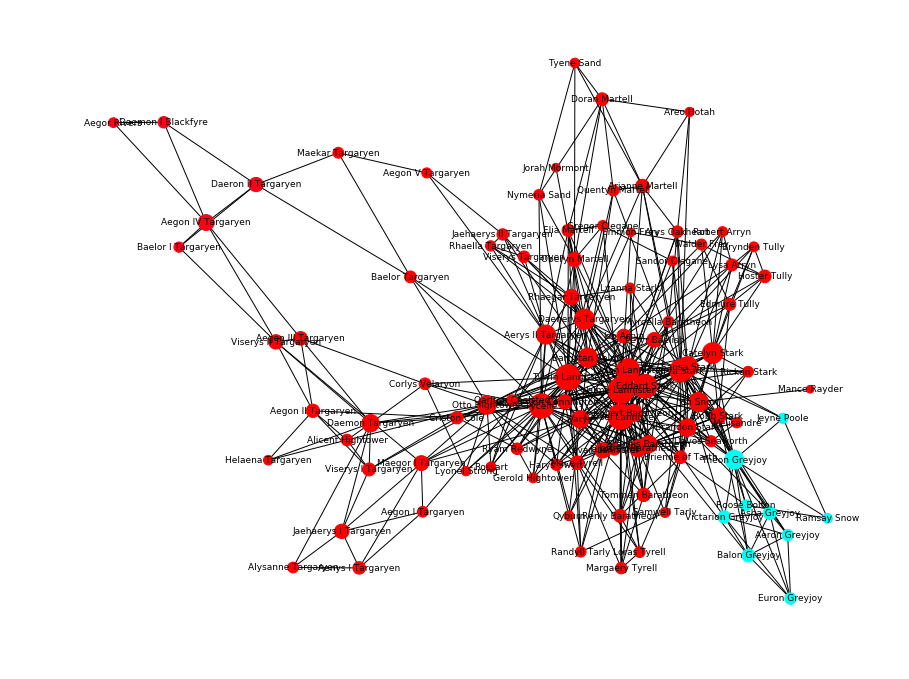

In [70]:
# detecting communities in the reduced dataset and coloring the nodes accordingly

import matplotlib.pyplot as plt


node_pagerank = nx.algorithms.pagerank(subgraph)
node_sizes = []
for node in subgraph.nodes: 
    node_sizes.append(20000*node_pagerank[node])
node_colors = [None]*subgraph.number_of_nodes()
node_names = [node for node in subgraph.nodes]
for community_id, community in enumerate(communities):
    community_color = colors(community_id)
    for node in community:
        node_colors[node_names.index(node)] = community_color
plt.figure(figsize=(12,9))
nx.draw(subgraph, pos=nx.spring_layout(subgraph),node_size=node_sizes,node_color=node_colors, with_labels = True, font_size = 9)
plt.show() 

In [71]:
network_culture=dict()
for name in node_names:
    network_culture[name]=character_cultur[name]


network_culture

{'Aegon I Targaryen': None,
 'Aegon II Targaryen': None,
 'Aegon III Targaryen': None,
 'Aegon IV Targaryen': None,
 'Aegon V Targaryen': None,
 'Aegor Rivers': ['Rivermen'],
 'Aenys I Targaryen': None,
 'Aeron Greyjoy': ['ironborn'],
 'Aerys II Targaryen': None,
 'Alicent Hightower': ['Reach'],
 'Alysanne Targaryen': ['Crownlands'],
 'Areo Hotah': ['Norvos'],
 'Arianne Martell': ['Dornishmen'],
 'Arya Stark': ['northmen'],
 'Arys Oakheart': ['Reach'],
 'Asha Greyjoy': ['ironborn'],
 'Baelor I Targaryen': None,
 'Baelor Targaryen': None,
 'Balon Greyjoy': None,
 'Barristan Selmy': ['Marcher'],
 'Brandon Stark': ['northmen'],
 'Brienne of Tarth': ['Stormlands'],
 'Brynden Tully': ['rivermen'],
 'Catelyn Stark': ['rivermen'],
 'Cersei Lannister': ['Westermen'],
 'Corlys Velaryon': ['Crownlands'],
 'Criston Cole': ['Stormlander'],
 'Daemon I Blackfyre': ['Crownlands'],
 'Daemon Targaryen': ['Crownlands'],
 'Daenerys Targaryen': ['Free Cities'],
 'Daeron II Targaryen': None,
 'Davos Seawor

In [74]:
culture_inv = dict()
for k,v in network_culture.items():
    v = str(v)
    v = v.strip("[']")
    if v in culture_inv:
        culture_inv[v].append(k)
    else:
        culture_inv[v] = [k]
culture_inv

{'Asshai': ['Melisandre'],
 'Crownlands': ['Helaena Targaryen',
  'Daemon Targaryen',
  'Daemon I Blackfyre',
  'Rhaegar Targaryen',
  'Rhaella Targaryen',
  'Corlys Velaryon',
  'Alysanne Targaryen',
  'Qarlton Chelsted'],
 'Dornishmen': ['Elia Martell',
  'Quentyn Martell',
  'Doran Martell',
  'Arianne Martell',
  'Oberyn Martell',
  'Nymeria Sand',
  'Tyene Sand'],
 'Free Cities': ['Viserys Targaryen', 'Daenerys Targaryen'],
 'Ironborn': ['Victarion Greyjoy'],
 'Marcher': ['Barristan Selmy'],
 'None': ['Pycelle',
  'Aegon I Targaryen',
  'Aenys I Targaryen',
  'Aegon II Targaryen',
  'Viserys I Targaryen',
  'Aegon III Targaryen',
  'Viserys II Targaryen',
  'Aegon IV Targaryen',
  'Daeron II Targaryen',
  'Baelor I Targaryen',
  'Aegon V Targaryen',
  'Jaehaerys II Targaryen',
  'Maegor I Targaryen',
  'Balon Greyjoy',
  'Aerys II Targaryen',
  'Rossart',
  'Stannis Baratheon',
  'Jaehaerys I Targaryen',
  'Myrcella Baratheon',
  'Robb Stark',
  'Baelor Targaryen',
  'Joffrey Bara

C:\Users\AlonPc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  else:


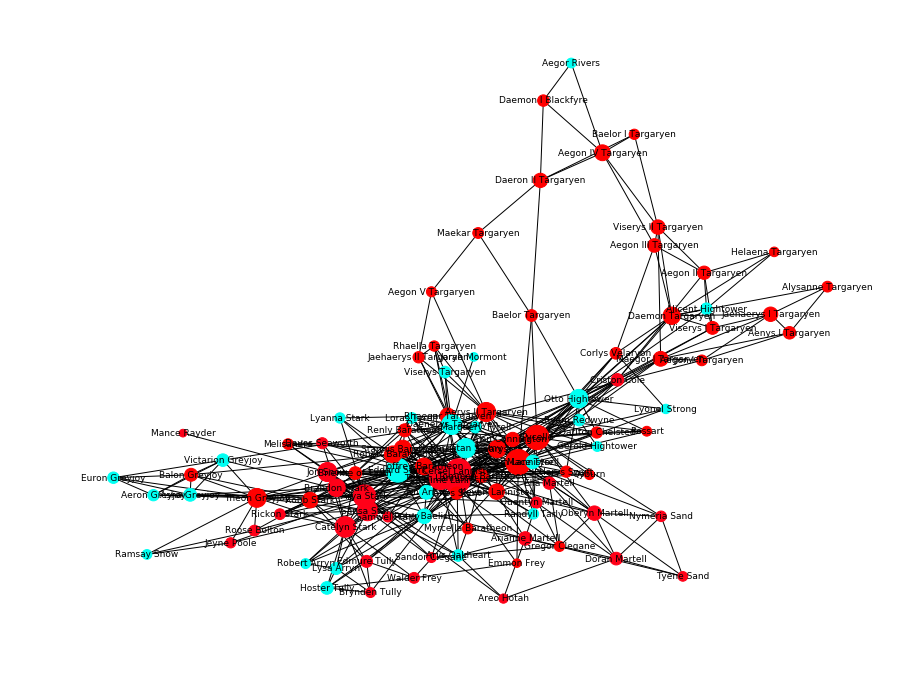

In [77]:
#The more central the node, the bigger its circle is. the nodes are colored according to their culture
import random
import matplotlib.pyplot as plt


node_pagerank = nx.algorithms.pagerank(subgraph)
node_sizes = []
for node in subgraph.nodes: 
    node_sizes.append(20000*node_pagerank[node])
node_colors = [None]*subgraph.number_of_nodes()
node_names = [node for node in subgraph.nodes]
for k, v in culture_inv.items():
    culture_color = colors(random.random()) #create color for culture
    for node in v:
        node_colors[node_names.index(node)] = culture_color
plt.figure(figsize=(12,9))
nx.draw(subgraph, pos=nx.spring_layout(subgraph),node_size=node_sizes,node_color=node_colors, with_labels = True, font_size = 9)
plt.show() 

## NLP Analysis

In [117]:
#Opening the file with all the links
import re

# Extracting the links 
c='links_list_text.txt'
F = open('links_list_text.txt','r')
# print (F.read())

links=[]

for i in F.read().split('\n'):
#
    link= re.findall('<loc>[\s\S]*?<\/loc>',i)
    if link != []:
        # print(link[0].split('<loc>')[1].split('</loc>')[0])
        links.append(link[0].split('<loc>')[1].split('</loc>')[0])

links[0:20]





['http://awoiaf.westeros.org/index.php/1000_BC',
 'http://awoiaf.westeros.org/index.php/100_BC',
 'http://awoiaf.westeros.org/index.php/112_BC',
 'http://awoiaf.westeros.org/index.php/114_BC',
 'http://awoiaf.westeros.org/index.php/120_AC',
 'http://awoiaf.westeros.org/index.php/126_BC',
 'http://awoiaf.westeros.org/index.php/128_BC',
 'http://awoiaf.westeros.org/index.php/129_AC',
 'http://awoiaf.westeros.org/index.php/130_AC',
 'http://awoiaf.westeros.org/index.php/131_AC',
 'http://awoiaf.westeros.org/index.php/132_AL',
 'http://awoiaf.westeros.org/index.php/133_AL',
 'http://awoiaf.westeros.org/index.php/134_AL',
 'http://awoiaf.westeros.org/index.php/135_AL',
 'http://awoiaf.westeros.org/index.php/136_AL',
 'http://awoiaf.westeros.org/index.php/137_AL',
 'http://awoiaf.westeros.org/index.php/138_AL',
 'http://awoiaf.westeros.org/index.php/139_AL',
 'http://awoiaf.westeros.org/index.php/140_AL',
 'http://awoiaf.westeros.org/index.php/141_AL']

In [ ]:
#Scraping the text

import requests
from bs4 import BeautifulSoup
import pickle
counter=0
all_text=dict()
save_path = r'C:\Users\AlonPc\Desktop\data'
with open('all text.txt', "w", encoding='utf8') as text_file:
    for link in links:

        try:
            text_file.write('<ml_project_spliter>'+link+'</ml_project_spliter>\n')
            html = requests.get(link)
            soup = BeautifulSoup(html.content, "lxml")
            text = soup.find('div', {'id': 'mw-content-text'}).text

            text_file.write(text+ '\n')
            counter +=1
            print(counter)
            all_text[link]=text
        except:
            continue
            
# Save the data          
import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
save_obj(all_text,'my dict')

In [82]:
#Total downloaded pages 
print ("Length : %d" % len (text_dict))

for k,v in text_dict.items():
    try:
        text_dict[k]=re.sub("[^a -zA -Z]"," ", v).lower().split()
    except:
        continue


Length : 9950


In [83]:
#Making sure there are no empty values in the dictionary 
for k,v in text_dict.items():
    if v==[]:
        del text_dict[k]

In [84]:
words_count=dict()
for key in text_dict:
    words_count[key] = []
    words_count[key].append(len(text_dict[key]))
    


In [85]:
#Average text length
count_list=[]
for k,v in words_count.items():
    count_list.append(v[0])
print ('Average text length: '+ str((sum(count_list) / float(len(count_list)))))

Average text length: 809.2419095477387


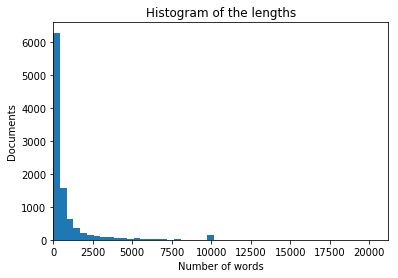

In [86]:
#Histogram of the text's lengths
from matplotlib import pyplot as plt
plt.xlim([min(count_list), max(count_list)])
n_bins = 50
plt.hist(count_list, n_bins, histtype='bar', stacked=True)
plt.title('Histogram of the lengths')
plt.xlabel('Number of words')
plt.ylabel('Documents')
plt.show()

In [87]:
#Total words found (before cleaning text)
print('Total words found: '+ str((sum(count_list))))

Total words found: 8051957


In [ ]:
all_text_as_string=''
for k,v in text_dict.items():
    all_text_as_string +=(str(v)+'\n')

In [89]:
#Cleaning the text
clean_all_text=re.sub('[0-9]+','', all_text_as_string).lower()
clean_all_text=clean_all_text.replace(']','')
clean_all_text=clean_all_text.replace('[','')
clean_all_text=clean_all_text.replace('.','')
clean_all_text=clean_all_text.replace(',','')
clean_all_text=clean_all_text.replace(')', '')
clean_all_text=clean_all_text.replace('(', '')
clean_all_text=clean_all_text.replace(':', '')
clean_all_text=clean_all_text.replace('"', '')
clean_all_text=clean_all_text.replace('?', '')
clean_all_text=clean_all_text.replace('$', '')
clean_all_text=clean_all_text.replace('!', '')
clean_all_text=clean_all_text.replace("'", '')
clean_all_text=clean_all_text.replace('&', '')
clean_all_text=clean_all_text.replace('/', '')
clean_all_text=clean_all_text.replace('%', ' ')
clean_all_text=clean_all_text.replace(' - ', ' ')
clean_all_text=clean_all_text.replace('+', '')
clean_all_text=clean_all_text.replace('_', '')
clean_all_text=clean_all_text.replace('@', '')
clean_all_text=clean_all_text.replace('--', '')
clean_all_text=clean_all_text.replace('#', '')
clean_all_text=clean_all_text.replace('=', '')
clean_all_text=clean_all_text.replace('â', '')
clean_all_text=clean_all_text.replace('*', '')
clean_all_text=clean_all_text.replace('-', '')
clean_all_text=clean_all_text.replace(';', '')
clean_all_text=clean_all_text.replace('<', '')
clean_all_text=clean_all_text.replace('>', '')


In [90]:
#Total words in all of the documants together (after cleaning)
from collections import Counter
split_clean_text=clean_all_text.split()
clean_text_counter=Counter(split_clean_text)
len(split_clean_text)

7768747

In [91]:
#number of unique words after cleaning: 
len(clean_text_counter)

49169

C:\Users\AlonPc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


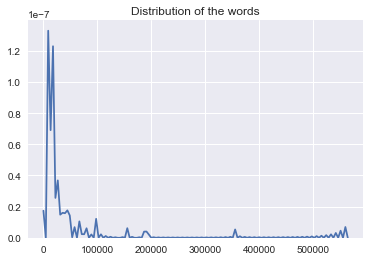

In [92]:
#Distribution of the words' appearances
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dist_list=[]
for i in clean_text_counter.values():
    # print(i)
    dist_list.append(i)
dist_list = np.asarray(dist_list)
sns.set(color_codes=True)
sns.distplot(dist_list,hist=False)
plt.title('Distribution of the words')
plt.show()


In [93]:
#removing stop words
import re
from nltk.corpus import stopwords
enter_model=[]
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s')
text_without_stopwords = pattern.sub('', clean_all_text)
text_without_stopwords=text_without_stopwords.split('\n')
for i in text_without_stopwords:
    enter_model.append(i.split())


In [94]:
# Train a Word2Vec model
import gensim, logging
logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)
model=gensim.models.Word2Vec(enter_model,min_count=2,window=10,size=150)

C:\Users\AlonPc\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2019-01-26 20:21:45,117:WARNING:consider setting layer size to a multiple of 4 for greater performance
2019-01-26 20:21:45,125:INFO:collecting all words and their counts
2019-01-26 20:21:45,133:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-26 20:21:45,302:INFO:PROGRESS: at sentence #10000, processed 38848 words, keeping 1560 word types
2019-01-26 20:21:45,387:INFO:PROGRESS: at sentence #20000, processed 80052 words, keeping 1560 word types
2019-01-26 20:21:45,483:INFO:PROGRESS: at sentence #30000, processed 121705 words, keeping 1560 word types
2019-01-26 20:21:45,535:INFO:PROGRESS: at sentence #40000, processed 162965 words, keeping 1560 word types
2019-01-26 20:21:45,604:INFO:PROGRESS: at sentence #50000, processed 204558 words, keeping 1560 word 

2019-01-26 20:21:49,481:INFO:PROGRESS: at sentence #720000, processed 3163857 words, keeping 40511 word types
2019-01-26 20:21:49,502:INFO:PROGRESS: at sentence #730000, processed 3182512 words, keeping 40683 word types
2019-01-26 20:21:49,538:INFO:PROGRESS: at sentence #740000, processed 3227072 words, keeping 41113 word types
2019-01-26 20:21:49,584:INFO:PROGRESS: at sentence #750000, processed 3272006 words, keeping 41426 word types
2019-01-26 20:21:49,624:INFO:PROGRESS: at sentence #760000, processed 3331295 words, keeping 41596 word types
2019-01-26 20:21:49,660:INFO:PROGRESS: at sentence #770000, processed 3373620 words, keeping 41885 word types
2019-01-26 20:21:49,700:INFO:PROGRESS: at sentence #780000, processed 3418624 words, keeping 42095 word types
2019-01-26 20:21:49,730:INFO:PROGRESS: at sentence #790000, processed 3448585 words, keeping 42256 word types
2019-01-26 20:21:49,770:INFO:PROGRESS: at sentence #800000, processed 3489689 words, keeping 42533 word types
2019-01-26

2019-01-26 20:22:18,086:INFO:EPOCH 3 - PROGRESS: at 14.16% examples, 538255 words/s, in_qsize 5, out_qsize 0
2019-01-26 20:22:19,100:INFO:EPOCH 3 - PROGRESS: at 25.61% examples, 568440 words/s, in_qsize 4, out_qsize 1
2019-01-26 20:22:20,122:INFO:EPOCH 3 - PROGRESS: at 37.17% examples, 557122 words/s, in_qsize 5, out_qsize 0
2019-01-26 20:22:21,132:INFO:EPOCH 3 - PROGRESS: at 48.47% examples, 553267 words/s, in_qsize 6, out_qsize 0
2019-01-26 20:22:22,143:INFO:EPOCH 3 - PROGRESS: at 62.15% examples, 539215 words/s, in_qsize 5, out_qsize 0
2019-01-26 20:22:23,151:INFO:EPOCH 3 - PROGRESS: at 75.41% examples, 540817 words/s, in_qsize 5, out_qsize 0
2019-01-26 20:22:24,161:INFO:EPOCH 3 - PROGRESS: at 87.71% examples, 543117 words/s, in_qsize 5, out_qsize 0
2019-01-26 20:22:25,176:INFO:EPOCH 3 - PROGRESS: at 98.02% examples, 541543 words/s, in_qsize 6, out_qsize 0
2019-01-26 20:22:25,319:INFO:worker thread finished; awaiting finish of 2 more threads
2019-01-26 20:22:25,335:INFO:worker threa

In [95]:
#Illustrating the embeddings semantics
model.wv.most_similar('blade',topn=10)

2019-01-26 20:25:01,472:INFO:precomputing L2-norms of word weight vectors


[('longsword', 0.7670060396194458),
 ('steel', 0.7261192798614502),
 ('sword', 0.6949812173843384),
 ('hilt', 0.6874604225158691),
 ('greatsword', 0.6826107501983643),
 ('blades', 0.6578270792961121),
 ('thrust', 0.6532288193702698),
 ('wields', 0.6483639478683472),
 ('needle', 0.6180005669593811),
 ('weapon', 0.6160050630569458)]

In [122]:
#Illustrating the embeddings semantics
result = model.most_similar(positive=['father', 'woman'], negative=['man'], topn=1)
print(result)


[('mother', 0.6578028798103333)]


C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


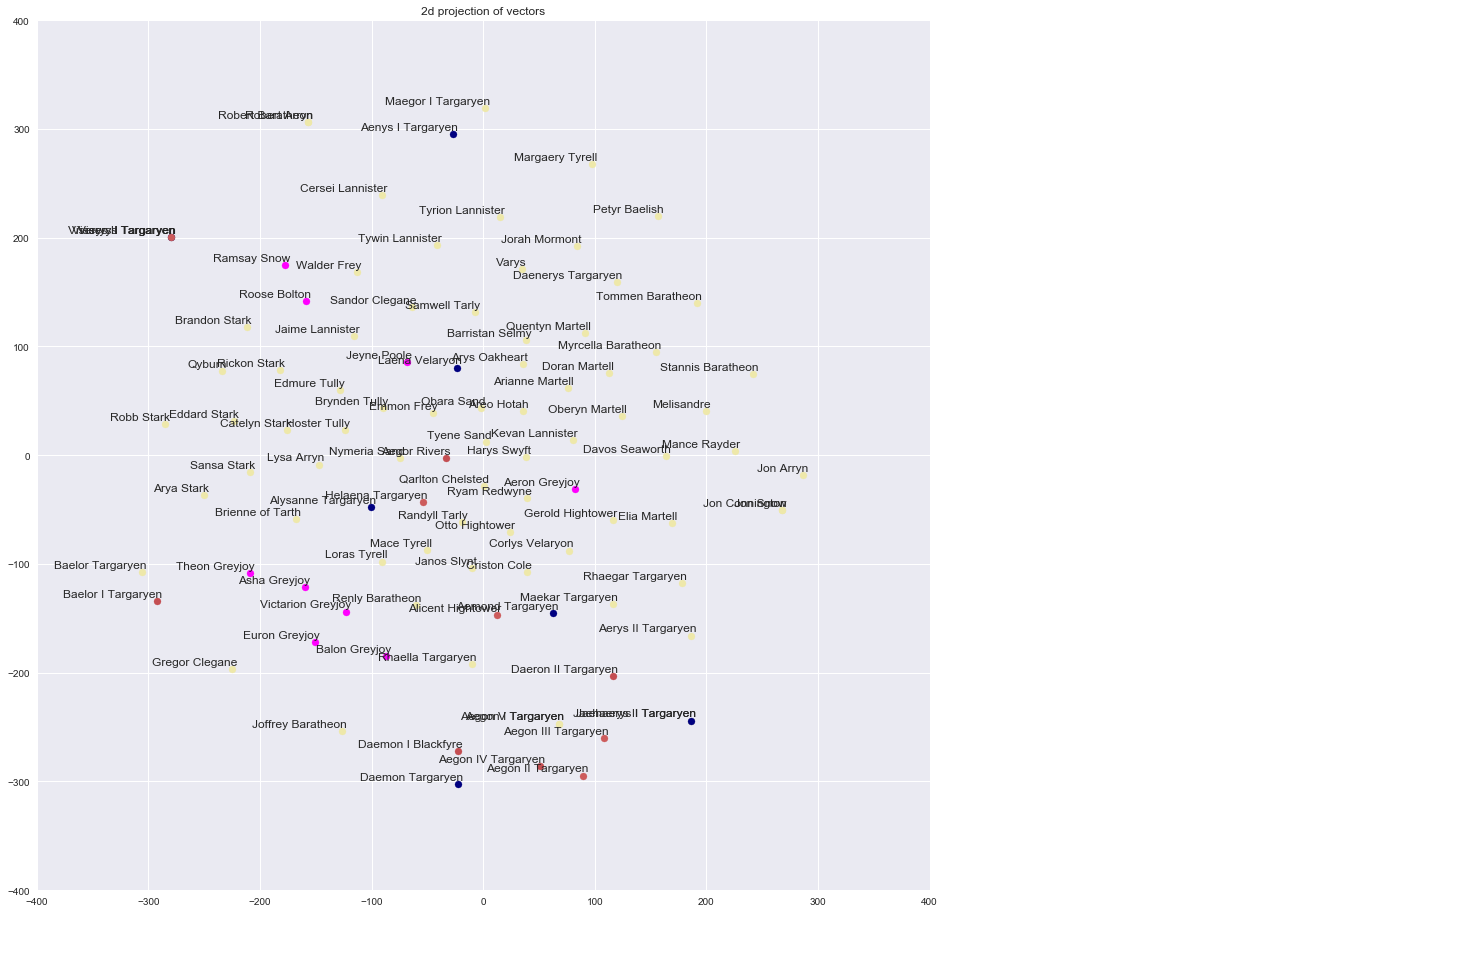

In [102]:
# 2d projection of the top 100 characters' vectors (grouped by communities)
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import csv
import pickle

import pickle

from matplotlib import colors as mcolors
import random


group_1=[u'Joffrey Baratheon', u'Mance Rayder', u'Petyr Baelish', u'Jon Arryn', u'Ryam Redwyne', u'Tywin Lannister', u'Robert Baratheon', u'Harys Swyft', u'Aegon I Targaryen', u'Tyene Sand', u'Brandon Stark', u'Janos Slynt', u'Brienne of Tarth', u'Eddard Stark', u'Aegon V Targaryen', u'Jaime Lannister', u'Gregor Clegane', u'Samwell Tarly', u'Corlys Velaryon', u'Pycelle', u'Kevan Lannister', u'Tommen Baratheon', u'Maekar Targaryen', u'Stannis Baratheon', u'Walder Frey', u'Aerys II Targaryen', u'Davos Seaworth', u'Rickon Stark', u'Lysa Arryn', u'Jon Connington', u'Arya Stark', u'Tyrion Lannister', u'Baelor Targaryen', u'Sandor Clegane', u'Mace Tyrell', u'Arianne Martell', u'Barristan Selmy', u'Oberyn Martell', u'Otto Hightower', u'Catelyn Stark', u'Varys', u'Arys Oakheart', u'Hoster Tully', u'Rhaegar Targaryen', u'Areo Hotah', u'Viserys Targaryen', u'Doran Martell', u'Qarlton Chelsted', u'Emmon Frey', u'Edmure Tully', u'Sansa Stark', u'Criston Cole', u'Maegor I Targaryen', u'Rhaella Targaryen', u'Elia Martell', u'Obara Sand', u'Quentyn Martell', u'Margaery Tyrell', u'Brynden Tully', u'Nymeria Sand', u'Daenerys Targaryen', u'Jorah Mormont', u'Melisandre', u'Jaehaerys II Targaryen', u'Cersei Lannister', u'Robb Stark', u'Loras Tyrell', u'Renly Baratheon', u'Robert Arryn', u'Myrcella Baratheon', u'Qyburn', u'Gerold Hightower', u'Jon Snow', u'Randyll Tarly']

group_2=[u'Aemond Targaryen', u'Aenys I Targaryen', u'Laena Velaryon', u'Jaehaerys I Targaryen', u'Viserys I Targaryen', u'Daemon Targaryen', u'Alysanne Targaryen']

group_3=[u'Asha Greyjoy', u'Jeyne Poole', u'Ramsay Snow', u'Theon Greyjoy', u'Aeron Greyjoy', u'Roose Bolton', u'Euron Greyjoy', u'Victarion Greyjoy', u'Balon Greyjoy']

group_4=[u'Alicent Hightower', u'Aegon II Targaryen', u'Helaena Targaryen', u'Viserys II Targaryen', u'Aegon III Targaryen']

group_5=[u'Baelor I Targaryen', u'Daemon I Blackfyre', u'Aegor Rivers', u'Aegon IV Targaryen', u'Daeron II Targaryen']

community_dict=dict()

for i in group_1:
    community_dict[i]='group 1'
for i in group_2:
    community_dict[i]='group 2'
for i in group_3:
    community_dict[i]='group 3'
for i in group_4:
    community_dict[i]='group 4'
for i in group_5:
    community_dict[i]='group 5'


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

colors_dict=dict()
characters_by_color=dict()

list_of_cultchers=[]
for i in (community_dict.values()):
    if i not in list_of_cultchers:
        list_of_cultchers.append(i)

colors=[]
counter=0
for i in range(100):
    r=random.choice(sorted_names)
    if r not in colors:
        colors.append(r)
        counter+=1
    if counter>len(list_of_cultchers)-1:
        break

for i in range(len(list_of_cultchers)):
    colors_dict[list_of_cultchers[i]]= colors[i]

for i in community_dict:
    characters_by_color[i]=colors_dict[community_dict[i]]


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    cultur = []

    for k, v in characters_by_color.items():
        tokens.append(model[k.split(' ')[0].lower()])
        labels.append(k)
        cultur.append(v)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))

    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=cultur[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i],),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('2d projection of vectors')
    plt.axis([-400, 400, -400, 400])
    plt.savefig('community projection.pdf')
    plt.show()


tsne_plot(model)
